In [1]:
import re
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# input files
source = '../src/qmlar.cpp'
header = '../src/qmlar.h'

In [3]:
# obtaining types
types = {'this': 'QMLAR'}
pattern = re.compile('([^*]+)\* ([^;]+);')
for line in open(header, 'r'):
    res = pattern.search(line)
    if not res: continue
    types[res.group(2).strip()] = res.group(1).strip()

In [4]:
# counting connects
connect_lines = []

for i, line in enumerate(open(source, 'r')):
    if line.find('connect(') >= 0: connect_lines.append(i)

In [22]:
# finding connects and replacing them
pattern = re.compile('^[ ]+connect\(([^,]+), &([^:]+)::([^,]+), ([^,]+), &([^:]+)::([a-zA-Z0-9_]+)')

In [33]:
G = nx.DiGraph(directed = True)
for i, line in enumerate(open(source, 'r')):
    res = pattern.search(line)
    if res:
        # functions
        fn1 = res.group(3)
        fn2 = res.group(6)
        # objects
        ob1 = res.group(1)
        ob2 = res.group(4)
        # types
        t1 = res.group(2)
        t2 = res.group(5)
        G.add_node(types[ob1])
        G.add_node(types[ob2])
        G.add_edge(types[ob1], types[ob2], weight = fn1 + ' $\\rightarrow$ ' + fn2)
        # new connect() syntax
        #new_connect = 'connect(%s, &%s::%s, %s, &%s::%s)' % (ob1, types[ob1], fn1, ob2, types[ob2], fn2)
        print(types[ob1], fn1, types[ob2], fn2)

HueThreshold imageAvailable MarkerBackEnd setPreview
HueThreshold imageAvailable QMLAR imageUpdated
MarkerMVPProvider newMVPMatrix FPSCalculator newFrame
ImageProviderAsync imageAvailable ImageScaler setInput
ImageScaler imageAvailable MarkerBackEnd setCamera
ImageScaler imageAvailable BlackenRest setInput
ImageScaler imageAvailable PerspectiveCamera setResolutionImage
BlackenRest imageAvailable HueThreshold setInput
HueThreshold imageAvailable UchiyaMarkerDetector setInput
UchiyaMarkerDetector dotsAll QMLAR setBlobs
UchiyaMarkerDetector markersUpdated QMLAR setMarkers
UchiyaMarkerDetector markersUpdated MarkerMVPProvider recompute
UchiyaMarkerDetector markersUpdated BlackenRest onNewMarkers
MarkerMVPProvider newMVMatrix BlackenRest onNewMVMatrix
MarkerMVPProvider newPMatrix BlackenRest onNewPMatrix
MarkerMVPProvider newMVMatrix PoseFilter setMV
PoseFilter newMVMatrix IMUMVPDecorator setMV
MarkerMVPProvider newPMatrix IMUMVPDecorator setP
MarkerMVPProvider newPMatrix PoseFilter setP
IM

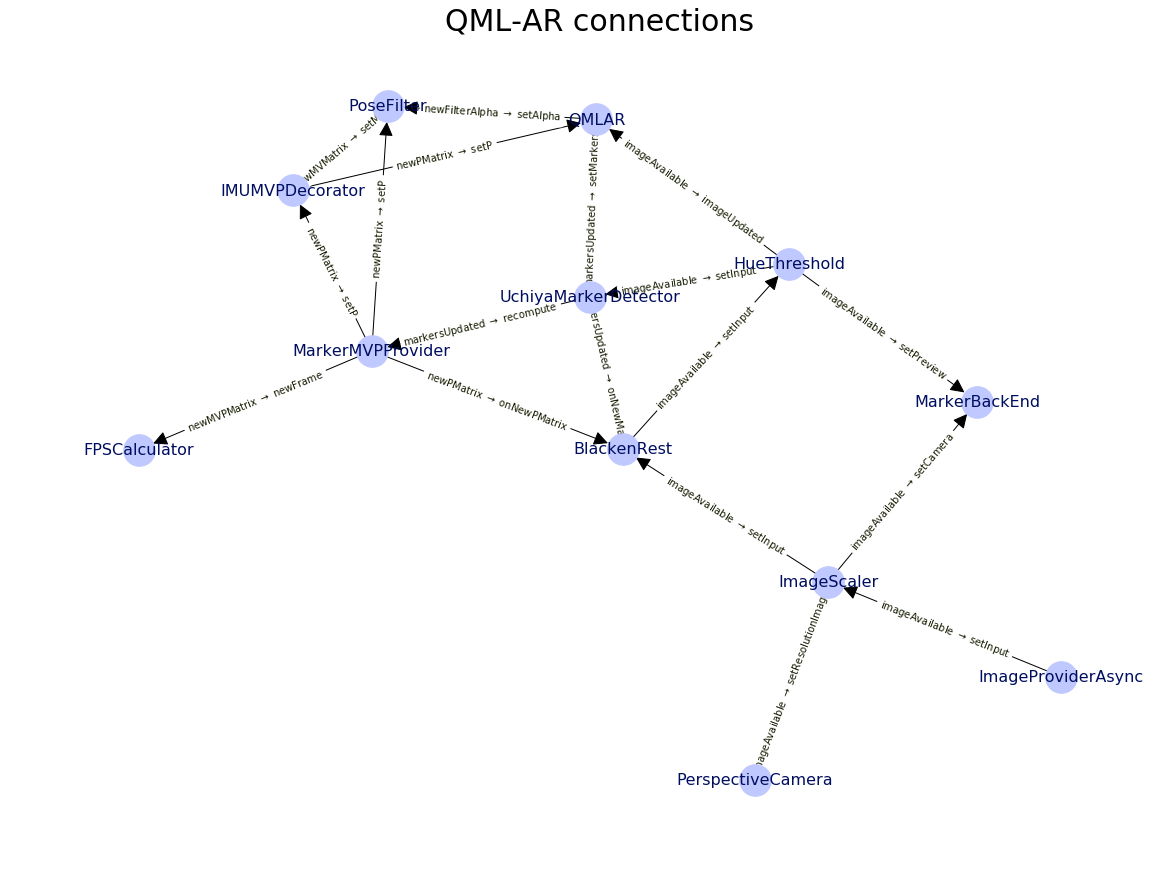

In [53]:
# drawing connect() graph
plt.figure(figsize=(20, 15))
plt.axis('off')
plt.title('QML-AR connections', fontdict = {'fontsize': 30})
pos = nx.drawing.nx_agraph.graphviz_layout(G)
# https://groups.google.com/forum/#!topic/networkx-discuss/hw3OVBF8orc
edge_labels = dict([((u,v), d['weight']) for u, v, d in G.edges(data=True)])
nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_labels, font_color = '#141c00')
nx.draw_networkx(G, pos, arrows = True, arrowstyle = '-|>', arrowsize = 30,
                 node_size = 1000, node_color = '#bfc8ff', font_size = 16, font_color = '#000e60')
plt.show()